# **Assignment: Decision Tree Regression for Car Price Prediction**

## **Objective**  
Train and evaluate a **Decision Tree Regression model** to predict car prices based on various features such as mileage, engine size, horsepower, etc.

---

## **Dataset**  
Download the **Car Price Prediction dataset** from Kaggle:  
🔗 [Car Price Prediction Dataset](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)  

- Load the dataset into a Pandas DataFrame.  
- Display the first few rows to understand the structure.  

---

## **Tasks**  

### **1. Data Preprocessing**  
- Drop irrelevant columns such as "Car_Name" (if applicable).  
- Handle missing values appropriately.  
- Convert categorical features (e.g., fuel type, seller type) into numerical using **One-Hot Encoding** or **Label Encoding**.  
- Normalize numerical features using **StandardScaler**.  
- Split the dataset into **80% training and 20% testing**.  

---

### **2. Train Decision Tree Regression Model**  
- Train a **Decision Tree Regressor** with default parameters.  
- Evaluate its initial performance.  

---

### **3. Hyperparameter Tuning**  
- Use **GridSearchCV** to tune the following hyperparameters:  
  - `max_depth` (Limit the depth of the tree)  
  - `min_samples_split` (Minimum samples required to split a node)  
  - `min_samples_leaf` (Minimum samples required at a leaf node)  

---

### **4. Model Evaluation**  
- Compute and print the following metrics for both the **default** and **tuned** models:  
  - **Mean Squared Error (MSE)**  
  - **Mean Absolute Error (MAE)**  
  - **R² Score**  

---

### **5. Visualization**  
- Plot **Actual vs. Predicted values** for the Decision Tree model.  
- Plot a **feature importance graph** to analyze which features contribute the most to car price prediction.  

---

## **Submission Guidelines**  
- Submit a **colab Notebook (.ipynb)** with code and visualizations.  


In [21]:
import pandas as pd
import numpy as np


In [22]:
df=pd.read_csv(r'I:\Cnn\Random_forrest_assignment\assignment_2\CarPrice_Assignment.csv')

In [23]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [24]:
# check the null and missing value in the data 
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [25]:
# now we standard scale mean normalize the value 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
    'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 
    'peakrpm', 'citympg', 'highwaympg']] = scaler.fit_transform(df[['symboling', 
    'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
    'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 
    'peakrpm', 'citympg', 'highwaympg']])
    

In [26]:
# now split the datset into the 20 and 80  percent
from sklearn.model_selection import train_test_split
X = df.drop(['CarName', 'price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# STEP 1: Scale selected numeric columns
numeric_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
                'curbweight', 'enginesize', 'boreratio', 'stroke', 
                'compressionratio', 'horsepower', 'peakrpm', 
                'citympg', 'highwaympg']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# STEP 2: Convert categorical columns to numeric using One-Hot Encoding
df = pd.get_dummies(df)

# STEP 3: Define Features (X) and Target (y)
# 🔁 Replace 'price' with your actual target column
X = df.drop('price', axis=1)
y = df['price']

# STEP 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# STEP 6: Make Predictions
y_pred = model.predict(X_test)


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = DecisionTreeRegressor(random_state=42)

# Correct parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'criterion': ['squared_error', 'absolute_error'],  # ✅ Fixed here
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Validation Mean Squared Error: {mse:.2f}")
print(f"Validation R-squared: {r2:.2f}")

Validation Mean Squared Error: 11931567.21
Validation R-squared: 0.85


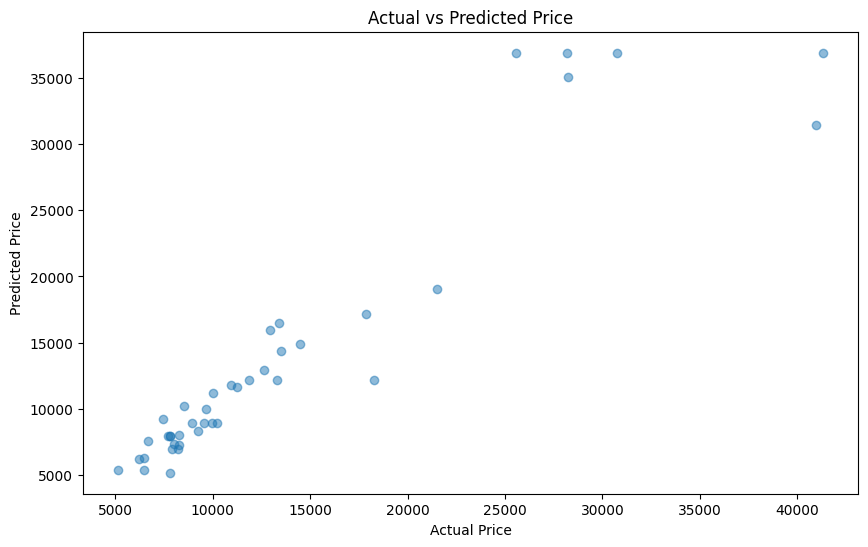

In [30]:
# now plot the actual and the predicted vlaue
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()